<a href="https://colab.research.google.com/github/FANG87003/2025_ML_hws/blob/main/hw4-3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 113-2 深度學習 作業 4-3

## 載入套件

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from ipywidgets import interact_manual

## 顯示中文

In [3]:
# 下載思源黑體字型（支援中文）
!wget -qO /usr/share/fonts/truetype/NotoSansCJKtc-Regular.otf https://github.com/googlefonts/noto-cjk/raw/main/Sans/OTF/TraditionalChinese/NotoSansCJKtc-Regular.otf

# 重新載入字型
import matplotlib.font_manager as fm
fm.fontManager.addfont('/usr/share/fonts/truetype/NotoSansCJKtc-Regular.otf')
plt.rcParams['font.family'] = 'Noto Sans CJK TC'

## 一、資料預處理

In [4]:
# 下載 CIFAR-10 數據集
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [5]:
# 顯示資料形狀
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


### 資料常模化 (normalization)

In [6]:
x_train = x_train / 255
x_test = x_test / 255

### One-hot encoding

In [7]:
y_train_oh = to_categorical(y_train, 10)
y_test_oh = to_categorical(y_test, 10)

### 顯示三張訓練圖片與真實標籤

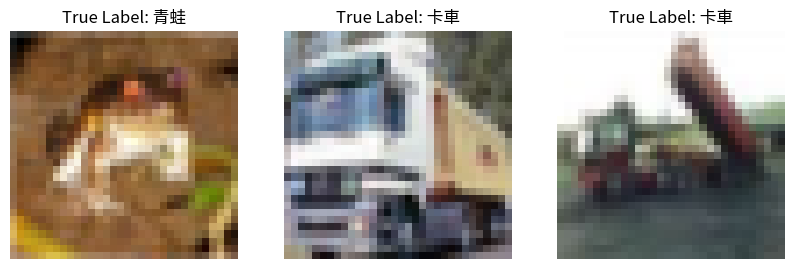

In [8]:
class_name = ['飛機', '汽車', '鳥', '貓', '鹿', '狗', '青蛙', '馬', '船', '卡車']

plt.figure(figsize=(10,4))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(x_train[i])
    plt.title(f"True Label: {class_name[y_train[i].item()]}")
    plt.axis('off')
plt.show()

## 二、建立神經網路模型

In [9]:
model = Sequential()

### 第01層：卷積層 (32 個 Filter，大小為 3x3)
* 圖片尺寸為	32x32
* 彩色圖片	3 通道（RGB）
* (32, 32, 32)
* 卷積層參數 = (Filter高 × Filter寬 × 前層輸入通道數 + 偏值) × 本層通道數





In [10]:
model.add(Conv2D(32, (3,3), padding='same',
        input_shape=(32,32,3),
        activation='relu'))  # (3x3x3+1)x32 = 896

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 第02層：Dropout 0.3

In [11]:
model.add(Dropout(0.3))

### 第03層：卷積層 (32 個 Filter，大小為 3x3)
* 圖片尺寸為	32x32
* (32, 32, 32)
* 前一層輸出 32 個通道
* 本層 32 通道

In [12]:
model.add(Conv2D(32, (3,3), padding='same',
        activation='relu',))  # (3x3x32+1)x32 = 9248

### 第04層：池化層
* (32, 32, 32) → (16, 16, 32)
* 保留前一層 32 個通道

In [13]:
model.add(MaxPooling2D(pool_size=(2,2)))

### 第05層：卷積層 (64 個 Filter，大小為 3x3)
* 圖片尺寸為	16x16
* (16, 16, 64)
* 前一層輸出 32 個通道
* 本層 64 通道

In [14]:
model.add(Conv2D(64, (3,3), padding='same',
        activation='relu',))  # (3x3x32+1)x64 = 18496

### 第06層：Dropout 0.3

In [15]:
model.add(Dropout(0.3))

### 第07層：卷積層 (64 個 Filter，大小為 3x3)
* 圖片尺寸為	16x16
* (16, 16, 64)
* 前一層輸出 64 個通道
* 本層 64 通道

In [16]:
model.add(Conv2D(64, (3,3), padding='same',
        activation='relu',))  # (3x3x64+1)x64 = 36928

### 第08層：池化層
* (16, 16, 64) → (8, 8, 64)
* 保留前一層 64 個通道

In [17]:
model.add(MaxPooling2D(pool_size=(2,2)))

### 第09層：卷積層 (128 個 Filter，大小為 3x3)
* 圖片尺寸為	8x8
* (8, 8, 128)
* 前一層輸出 64 個通道
* 本層 128 通道

In [18]:
model.add(Conv2D(128, (3,3), padding='same',
        activation='relu',))  # (3x3x64+1)x128 = 73856

### 第10層：Dropout 0.3

In [19]:
model.add(Dropout(0.3))

### 第11層：卷積層 (128 個 Filter，大小為 3x3)
* 圖片尺寸為	8x8
* (8, 8, 128)
* 前一層輸出 128 個通道
* 本層 128 通道

In [20]:
model.add(Conv2D(128, (3,3), padding='same',
        activation='relu',))  # (3x3x128+1)x128 = 147584

### 第12層：池化層
* (8, 8, 128) → (4, 4, 128)
* 保留前一層 128 個通道

In [21]:
model.add(MaxPooling2D(pool_size=(2,2)))

### 第13層：拉平層
* (4, 4, 128) → 2048

In [22]:
model.add(Flatten())

### 第14層：Dropout 0.3

In [23]:
model.add(Dropout(0.3))

### 第15層：全連接層 (2500 個神經元)
* 2500 個神經元對應 CIFAR-10 的 10 類別
* 每個神經元連接前一層的 2048 個輸入，共有 5120000 個權重 + 2500 個偏值 = 5122500 個參數。

In [24]:
model.add(Dense(2500, activation='relu')) # 2048x2500+2500 = 5122500

### 第16層：Dropout 0.3

In [25]:
model.add(Dropout(0.3))

### 第17層：全連接層 (1500 個神經元)
* 前一層的 2500 個通道 x 本層 1500 個通道 + 1500 個偏值 = 3751500 個參數。

In [26]:
model.add(Dense(1500, activation='relu')) # 2500x1500+1500 = 3751500

### 第18層：Dropout 0.3

In [27]:
model.add(Dropout(0.3))

### 第19層：全連接層 (10 個神經元)

In [28]:
model.add(Dense(10, activation='softmax')) # 1500x10+10 = 15010

In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2500)           │     5,122,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 2500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1500)           │     3,751,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        15,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,176,018 (35.00 MB)

 Trainable params: 9,176,018 (35.00 MB)

 Non-trainable params: 0 (0.00 B)

## 三、訓練神經網路模型

In [30]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

In [31]:
train_history = model.fit(
    x_train, y_train_oh,
    validation_split=0.2,
    batch_size=128,
    epochs=50,
    verbose=2)

Epoch 1/50
313/313 - 26s - 82ms/step - accuracy: 0.3106 - loss: 1.8398 - val_accuracy: 0.3917 - val_loss: 1.6989
Epoch 2/50
313/313 - 23s - 74ms/step - accuracy: 0.4802 - loss: 1.4149 - val_accuracy: 0.5332 - val_loss: 1.2998
Epoch 3/50
313/313 - 5s - 16ms/step - accuracy: 0.5689 - loss: 1.1980 - val_accuracy: 0.6110 - val_loss: 1.1070
Epoch 4/50
313/313 - 5s - 16ms/step - accuracy: 0.6227 - loss: 1.0541 - val_accuracy: 0.6646 - val_loss: 0.9343
Epoch 5/50
313/313 - 5s - 17ms/step - accuracy: 0.6642 - loss: 0.9519 - val_accuracy: 0.6840 - val_loss: 0.8873
Epoch 6/50
313/313 - 5s - 16ms/step - accuracy: 0.6912 - loss: 0.8786 - val_accuracy: 0.7143 - val_loss: 0.8256
Epoch 7/50
313/313 - 5s - 17ms/step - accuracy: 0.7159 - loss: 0.7992 - val_accuracy: 0.7295 - val_loss: 0.7746
Epoch 8/50
313/313 - 5s - 16ms/step - accuracy: 0.7304 - loss: 0.7570 - val_accuracy: 0.7302 - val_loss: 0.7635
Epoch 9/50
313/313 - 5s - 16ms/step - accuracy: 0.7492 - loss: 0.7141 - val_accuracy: 0.7461 - val_los

## 四、顯示 loss & accuracy 折線圖

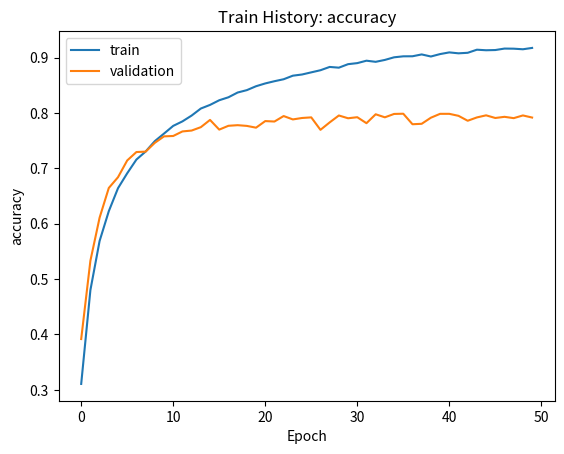

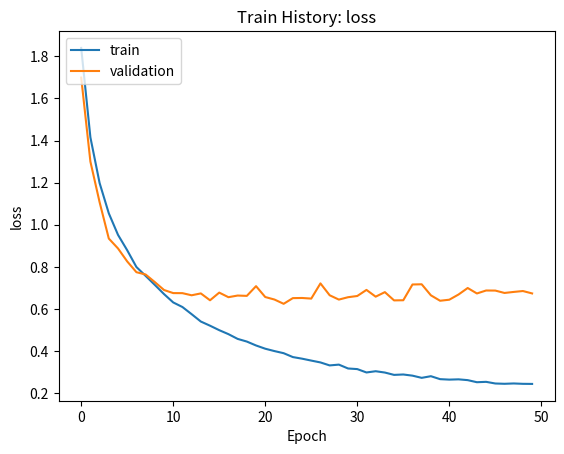

In [32]:
def show_train_history(train_history, train, validation):
  plt.plot(train_history.history[train])
  plt.plot(train_history.history[validation])
  plt.title(f'Train History: {train}')
  plt.ylabel(train)
  plt.xlabel('Epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()

show_train_history(train_history, 'accuracy', 'val_accuracy')
show_train_history(train_history, 'loss', 'val_loss')

## 五、評估模型準確率

In [33]:
scores = model.evaluate(x_test, y_test_oh)
print(f"accuracy: {scores[1]*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7859 - loss: 0.7151
accuracy: 78.24%


## 六、預測

In [34]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [35]:
predictions.shape

(10000, 10)

In [36]:
predictions

array([[1.0835282e-03, 7.2802627e-04, 1.6306352e-04, ..., 5.7152896e-03,
        6.3569536e-03, 5.0303084e-04],
       [5.2860158e-04, 1.3701184e-02, 2.4265502e-08, ..., 2.4259877e-10,
        9.8574603e-01, 2.0405027e-05],
       [1.7449029e-01, 2.7441604e-03, 1.1275143e-03, ..., 2.1431691e-03,
        7.9787040e-01, 1.2327031e-02],
       ...,
       [6.5381126e-13, 5.1322849e-16, 1.6777859e-04, ..., 3.0325165e-10,
        3.4902499e-15, 7.3257704e-14],
       [3.5054584e-03, 9.9380785e-01, 9.2968539e-06, ..., 1.4568592e-05,
        2.4730364e-06, 1.8144633e-03],
       [9.4705858e-12, 7.6740533e-15, 2.3572492e-08, ..., 9.9679250e-01,
        8.5898955e-11, 2.5044284e-13]], dtype=float32)

In [37]:
predicted_classes = np.argmax(predictions, axis=1)

## 七、顯示圖片與標籤名稱

In [38]:
import matplotlib.pyplot as plt

def plot_images_labels_prediction(images, true_labels, pred_labels, label_names, idx, num):
  plt.figure(figsize=(6, 7))
  if num > 25: num = 25
  for i in range(num):
    plt.subplot(5, 5, i + 1)
    plt.imshow(images[idx + i])

    true_idx = np.squeeze(true_labels[idx + i])
    pred_idx = np.squeeze(pred_labels[idx + i])

    true_name = label_names[true_idx]
    pred_name = label_names[pred_idx]

    plt.title(f'True: {true_name}\nPred: {pred_name}', fontsize=10)
    plt.axis('off')

  plt.tight_layout()
  plt.show()

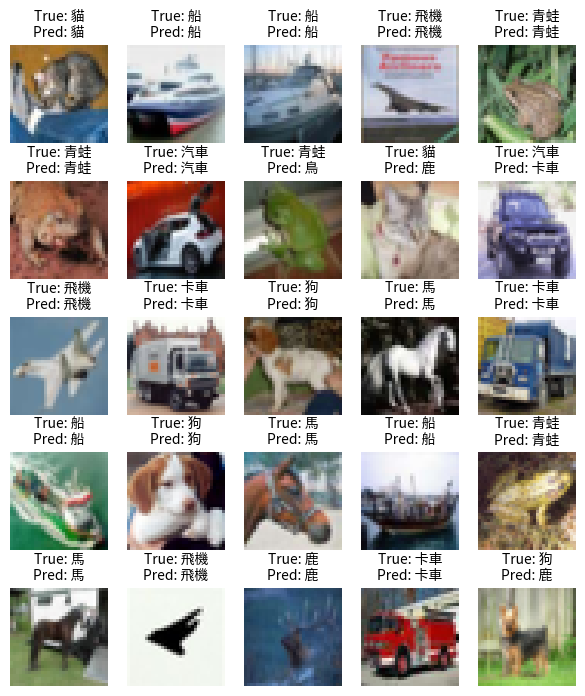

In [39]:
plot_images_labels_prediction(x_test, y_test, predicted_classes, class_name, idx=0, num=25)

## 八、混淆矩陣 (Confusion Matrix)

In [40]:
import pandas as pd

pd.crosstab(np.squeeze(y_test), predicted_classes, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,809,9,48,14,23,3,7,10,60,17
1,10,863,3,8,4,7,5,4,31,65
2,52,4,691,54,79,37,45,26,10,2
3,27,3,54,620,44,131,71,31,11,8
4,10,1,47,54,786,19,35,41,5,2
5,10,2,47,191,40,647,26,30,5,2
6,7,1,32,50,26,17,856,4,6,1
7,13,1,20,65,50,25,5,815,2,4
8,50,12,13,11,10,5,9,2,871,17


## 九、儲存完整模型

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [42]:
%cd /content/drive/MyDrive/Colab Notebooks/

/content/drive/MyDrive/Colab Notebooks


In [43]:
model.save('cnn_cifar10_model_4-3.keras')

## 十、interact_manual

神經網路判斷為： 貓
正確答案為： 貓


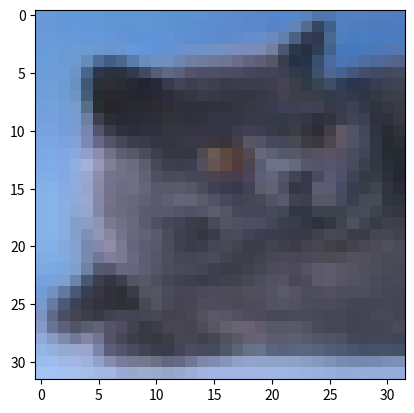

In [44]:
def test(測試編號):
  plt.imshow(x_test[測試編號], cmap='Greys')
  print('神經網路判斷為：', class_name[predicted_classes[測試編號]])
  print('正確答案為：', class_name[np.squeeze(y_test[測試編號])])

#interact_manual(test, 測試編號=(0, len(x_test)-1))
test(7014)